### Part 1: The Ideal Case

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
G = 6.6743E-11
g = 9.81
ME = 5.972E24
Mm = 7.35E22
RE = 6378100
Rm = 1738100


In [3]:
# 1

# no drag -> alpha = 0 -> a = -g

In [4]:
tpt1 = np.sqrt(2*4000/g)

Using, with x0 = 0 v0 = 0, $y = \frac{1}{2}at^2$, 

$t = sqrt(\frac{2 y_f}{-g})$

In [5]:
print(f'This gives {tpt1:f} seconds')

This gives 28.556862 seconds


#2  

$\frac{dy}{dt} = v $

$\frac{dv}{dt} = -g - \alpha |v|^\gamma$

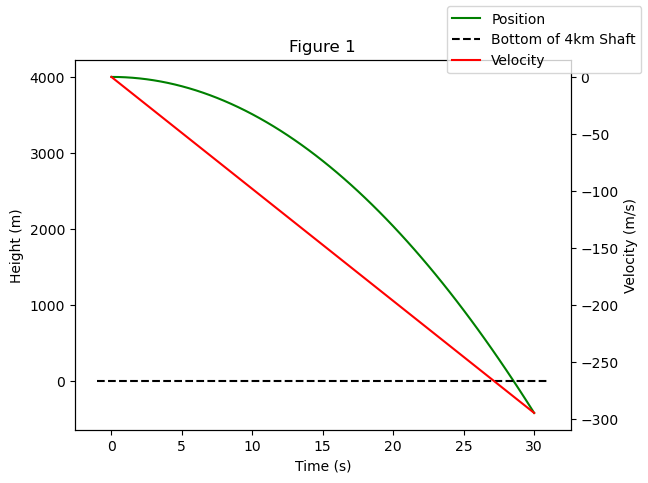

In [6]:
def grav_deriv(t, s):
    x, v = s
    dydt = v
    dvdt = -g - alpha*v**gamma
    return dydt, dvdt

alpha = 0
gamma = 0 

def shaft(t,s):
    return s[0]

t0,tf = 0, 30
x0, v0 = 4000, 0
t_eval = np.linspace(t0,tf,61)
soln = solve_ivp(grav_deriv, (t0,tf),[x0,v0], t_eval=t_eval, events=shaft)
x, v = soln.y

fig, ax = plt.subplots()
ax.plot(t_eval,x, 'g', label='Position')
ax2 = ax.twinx()
ax2.plot(t_eval, v, 'r', label='Velocity')
ax2.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Height (m)')
ax.set_title('Figure 1')
ax.hlines(0,-1,31,color='black',linestyles='dashed', label='Bottom of 4km Shaft')
fig.legend();

In [7]:
print(f'The time of the event using solve_ivp and no drag is {soln.t_events[0][0]:f} seconds\nThis is exactly the same time that I calculated analytically. I would not expect to see anything different since both solutions were calculated off of the same parameters and laws of physics. \nThe only difference is that the solver is a little bit more complex.')

The time of the event using solve_ivp and no drag is 28.556862 seconds
This is exactly the same time that I calculated analytically. I would not expect to see anything different since both solutions were calculated off of the same parameters and laws of physics. 
The only difference is that the solver is a little bit more complex.


# Part 2: Including Drag and a Variable

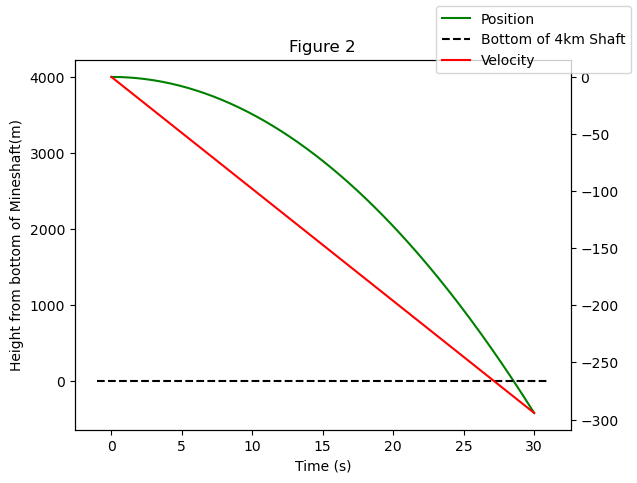

In [8]:
t0,tf = 0, 30
x0, v0 = RE, 0

alpha, gamma = 0,0

def grav_deriv2(t, s):
    x, v = s
    dydt = v
    dvdt = -g*(x/RE) + alpha*np.abs(v)**gamma
    return dydt, dvdt

def shaft2(t,s):
    return s[0] - (RE-4000)

t_eval2 = np.linspace(t0,tf,200)
soln2 = solve_ivp(grav_deriv2, (t0,tf),[x0,v0], t_eval=t_eval2,events=shaft2)
x, v = soln2.y

fig, ax = plt.subplots()
ax.plot(t_eval2,x-RE+4000, 'g', label='Position')
ax.set_ybound(0,4000)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Height from bottom of Mineshaft(m)')
ax.set_title('Figure 2')
ax2 = ax.twinx()
ax2.plot(t_eval2, v, 'r', label='Velocity')
ax.hlines(0,-1,31,color='black',linestyles='dashed', label='Bottom of 4km Shaft')
fig.legend();

In [9]:
print(f'Constant G: Impact at {soln.t_events[0][0]:f} sec.\nG as a function of r: Impact at {soln2.t_events[0][0]:f} sec.')

Constant G: Impact at 28.556862 sec.
G as a function of r: Impact at 28.558355 sec.


Changing to a height-dependent g has an effect, but it is a very minimal one since we are only travelling 4km out of all 6,378km of the Earth's radius. It results in the impact being .00150 seconds later.

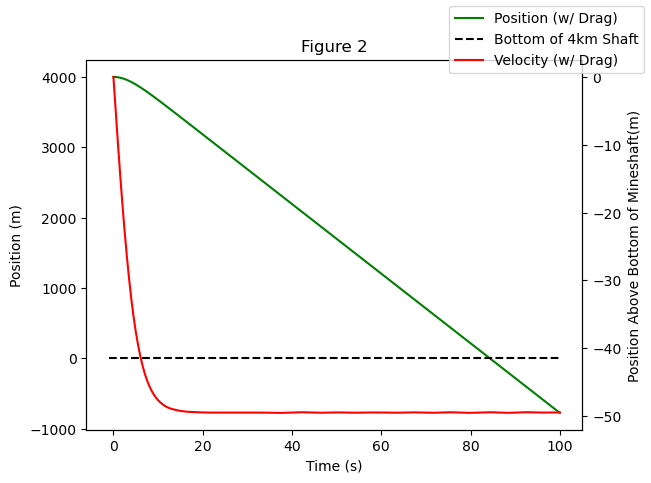

In [10]:
gamma = 2
alpha = .004
t0,tf = 0,100
x0,v0 = RE, 0

t_eval3 = np.linspace(t0,tf,200)

soln3 = solve_ivp(grav_deriv2, (t0,tf),[x0,v0],t_eval=t_eval3, events=shaft2)
soln3.y

x, v = soln3.y

fig, ax = plt.subplots()
ax.plot(t_eval3,x-RE+4000, 'g', label='Position (w/ Drag)')
ax.set_ybound(0,4000)
ax2 = ax.twinx()
ax2.plot(t_eval3, v,'r',label='Velocity (w/ Drag)')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Position (m)')
ax2.set_ylabel('Position Above Bottom of Mineshaft(m)')
ax.set_title('Figure 2')
ax.hlines(0,-1,100,color='black',linestyles='dashed', label='Bottom of 4km Shaft')
fig.legend();
fig.savefig('Fig2+Drag.png')

To calibrate the value of alpha, I first started with alpha=1 and planned to adjust from there based on the terminal velocity returned. I realised here that I needed to formulate my grav_deriv2 function so that the drag force would counter gravity - I initially had it subtracted so a positive alpha further accelerated the mass. After sorting this out, I adjusted alpha until I saw the desired terminal velocity of 50 m/s on the graph.

I noted that I also had to adjust the t_eval time interval to 0 to 100 seconds to reach the point where the test mass impacts.

In [11]:
print(f'With drag, the impact occurs at time t = {soln3.t_events[0][0]:f} sec.')

With drag, the impact occurs at time t = 84.278646 sec.


Including drag drastically increases the fall time to 84.27865 seconds. The graph shows that velocity drastically levels off at terminal velocity in the first 10-15 seconds, which is why it 
takes so much longer to fall. The acceleration that occurred without drag brought velocity over 5 times faster to -250 m/s by the time of impact.

# Part 3: The Coriolis Force

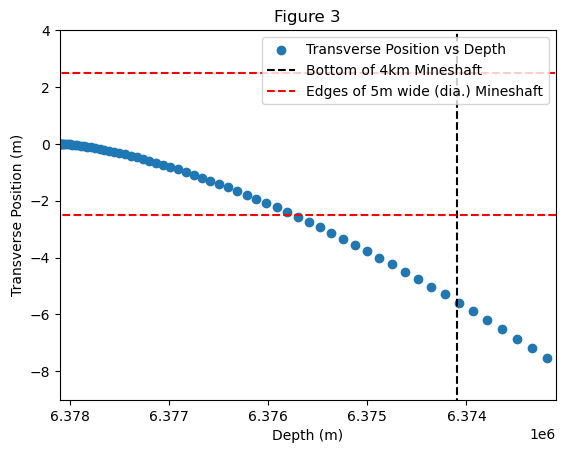

In [12]:
omega = 7.272E-5 #rad/s
alpha = 0
mass = 1

def grav_coriolis(t, s):
    xx, vx, xy, vy = s
    dxxdt = vx
    dvxdt = 2*mass*omega*vy
    dxydt = vy
    dvydt = -g*(xy/RE) + alpha*np.abs(vy)**gamma - 2*mass*omega*vx
    return dxxdt, dvxdt, dxydt, dvydt

t0, tf = 0, 100
t_eval4 = np.linspace(t0,tf,200)
xx0, vx0, xy0, vy0 = 0, 0, RE, 0

soln4 = solve_ivp(grav_coriolis, (t0,tf), [xx0, vx0, xy0, vy0], t_eval = t_eval4)

xx, vx, xy, vy = soln4.y

fig, ax = plt.subplots()
ax.set_xlabel('Depth (m)')
ax.set_ylabel('Transverse Position (m)')
ax.scatter(xy, xx, label='Transverse Position vs Depth')
ax.vlines(RE-4000, -10,5,'k', linestyles='dashed',label='Bottom of 4km Mineshaft')
ax.invert_xaxis()
ax.hlines(-2.5, RE-5000, RE, 'r', linestyles='dashed',label='Edges of 5m wide (dia.) Mineshaft')
ax.hlines(2.5, RE-6000, RE+200, 'r', ls='--')
ax.set_xbound(RE -5000, RE)
ax.set_ybound(-9,4)
ax.set_title('Figure 3')
ax.legend();

plt.savefig('Coriolus.png')

It can clearly be seen in the graph that the transverse position of the test object would impact the wall 2.5 meters away from it at a depth well before the bottom of the mineshaft.

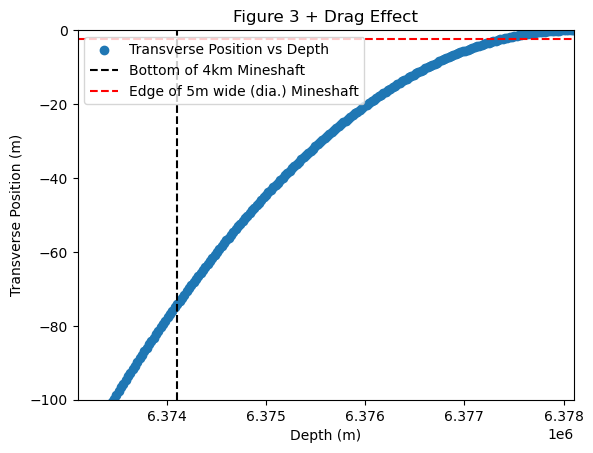

In [13]:
alpha = .04
t0, tf = 0, 300
t_eval4drag = np.linspace(t0,tf,200)
soln4drag = solve_ivp(grav_coriolis, (t0,tf), [xx0, vx0, xy0, vy0], t_eval = t_eval4drag)

xxdrag, vxdrag, xydrag, vydrag = soln4drag.y

fig, ax = plt.subplots()
ax.set_xlabel('Depth (m)')
ax.set_ylabel('Transverse Position (m)')
ax.scatter(xydrag, xxdrag, label='Transverse Position vs Depth')
ax.vlines(RE-4000, -100,0,'k', linestyles='dashed',label='Bottom of 4km Mineshaft')
ax.hlines(-2.5, RE-5000, RE, 'r', linestyles='dashed',label='Edge of 5m wide (dia.) Mineshaft')
ax.set_xbound(RE -5000, RE)
ax.set_ybound(-100,0)
ax.set_title('Figure 3 + Drag Effect')
ax.legend();

As we saw in 'Figure 3 + Drag Effect', the addition of the drag force drastically changes the time it takes for the test object to fall through the mineshaft since the velocity levels off around 10 seconds into the fall, and impact at the bottom of the shaft happens around 85 seconds. It also barely falls 1000 meters before impacting the side of the mineshaft. This much longer fall time allows the Coriolis force to affect the test object for a longer time and change its transverse position much more. It now drifts sideways almost 80 meters compared to the roughly 5 meters it drifted without drag. I also noticed that the dots are a lot more evenly spaced because it reaches terminal velocity and doesn't accelerate any more.

# Part 4: An Infinitely Deep Mine

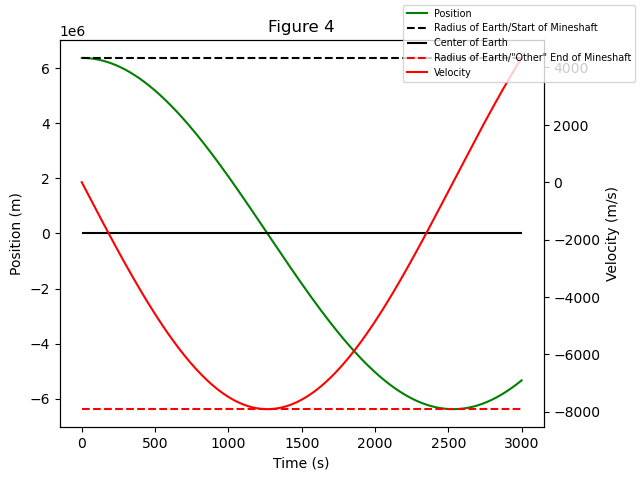

In [14]:
alpha = 0
x0, v0 = RE, 0

t0, tf = 0, 3000
t_eval5 = np.linspace(t0,tf,4*tf)

def otherside (t,s):
    return s[1]

def center (t,s):
    return s[0]

soln5 = solve_ivp(grav_deriv2, (t0,tf), [x0,v0], t_eval=t_eval5, events=(otherside,center))
x, v = soln5.y

fig, ax = plt.subplots()
ax.plot(t_eval5, x, 'g', label='Position')
ax2 = ax.twinx()
ax2.plot(t_eval5, v, 'r', label='Velocity')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Position (m)')
ax2.set_ylabel('Velocity (m/s)')
ax.hlines(RE,0,tf, 'k', linestyles='dashed',label='Radius of Earth/Start of Mineshaft')
ax.hlines(0, 0, tf, 'k', linestyles='solid',label='Center of Earth')
ax.hlines(-RE, 0, tf, 'r', linestyles='dashed',label='Radius of Earth/"Other" End of Mineshaft')
ax.set_title('Figure 4')
fig.legend(fontsize='x-small')
plt.tight_layout();
fig.savefig('Fig4.png')

In the graph, I see the test object fall through the center of the Earth (y=0) (and the velocity reaches its maximum) and continue to fall while the velocity decelerates until it is at the other side of the Earth and the velocity = 0. This makes sense given the conservation of energy and no drag to 'bleed off' energy via friction heat.

In [15]:
print(f'The object will reach the other side at time t = {soln5.t_events[0][1]:f} sec.\nThe object will reach the center of the Earth at time t = {soln5.t_events[1][0]:f} sec. and at velocity v = {soln5.y_events[1][0][1]:f} m/s')

The object will reach the other side at time t = 2532.613047 sec.
The object will reach the center of the Earth at time t = 1266.473470 sec. and at velocity v = -7910.759873 m/s


In [16]:
v = np.sqrt(G*ME / RE)
period = 2*np.pi*RE/v

print(f'The crossing time t = {soln5.t_events[0][1]:f} sec. is half of the orbital period (tau = {period:f} sec.) given the centripetal balance. Since the change in orbital position of the ball once it reaches the other side of the earth is only pi radians (or half a full orbit) this makes perfect sense. By the time it will have returned to the top of the mineshaft it started from, it will have taken the same amount of time as it would have to orbit the Earth once to end up back at the same position.')

The crossing time t = 2532.613047 sec. is half of the orbital period (tau = 5069.371200 sec.) given the centripetal balance. Since the change in orbital position of the ball once it reaches the other side of the earth is only pi radians (or half a full orbit) this makes perfect sense. By the time it will have returned to the top of the mineshaft it started from, it will have taken the same amount of time as it would have to orbit the Earth once to end up back at the same position.


# Part 5: A non-uniform Earth

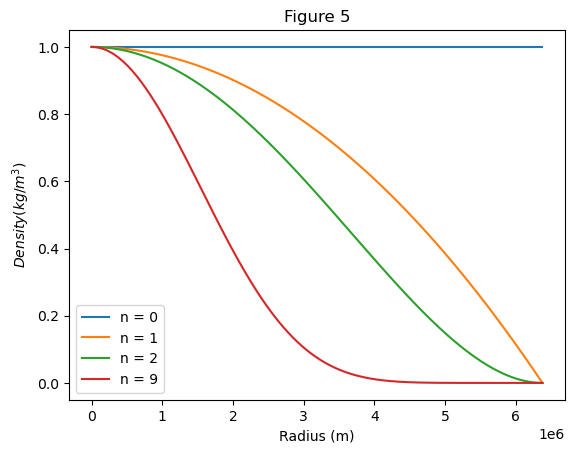

In [17]:
from scipy.integrate import quad
# part 1

rho_n = 1

def rho(r, n, rho_n):
    return rho_n*(1 - ((r**2)/(RE**2)))**n

r_eval = np.linspace(0,RE,200)

n_arr = [0,1,2,9]
fig, ax = plt.subplots()
ax.set_xlabel('Radius (m)')
ax.set_ylabel(r'$Density (kg/m^3)$')
ax.set_title('Figure 5')
for i in range(len(n_arr)):
    ax.plot(r_eval, rho(r_eval, n_arr[i], rho_n), label = f'n = {n_arr[i]}')
ax.legend();


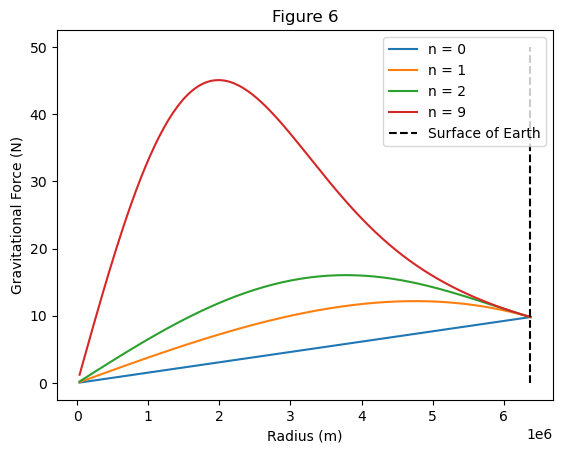

In [18]:
# part 2

def rho_int(r,n, rho_n):    # for calculating mass integral
    return r**2 * rho_n * (1 - ((r**2)/(RE**2)))**n
    
def rho_n_calc(r,n):    # without the rho n so that it can be integrated to find rho n
    return r**2 * (1 - ((r**2)/(RE**2)))**n

def mass(r, n, rho_n):
    return 4*np.pi*quad(rho_int, 0, r, (n, rho_n))[0]

def Fg(r, n, rho_n):
    if np.isclose(r,0):
        return np.nan
    else:
        return G * mass(r,n,rho_n) / r**2

rho_n_arr = []
for i in range(len(n_arr)):
    rho_n_arr.append(ME / (4*np.pi*quad(rho_n_calc,0, RE, (n_arr[i]))[0]))

Fg_vec = np.vectorize(Fg)

fig, ax = plt.subplots()
ax.set_xlabel('Radius (m)')
ax.set_ylabel('Gravitational Force (N)')
ax.set_title('Figure 6')
for i in range(len(n_arr)):
    ax.plot(r_eval, Fg_vec(r_eval, n_arr[i], rho_n_arr[i]), label = f'n = {n_arr[i]}')
ax.vlines(RE,0,50,'k',ls='--',label='Surface of Earth')
ax.legend();

When n = 0, the test object reaches the center of the Earth at t = 1267.240953 going -7905.971248 m/s
When n = 1, the test object reaches the center of the Earth at t = 1096.891482 going -10435.238778 m/s
When n = 2, the test object reaches the center of the Earth at t = 1035.138775 going -12200.745609 m/s
When n = 9, the test object reaches the center of the Earth at t = 943.874807 going -18391.996832 m/s


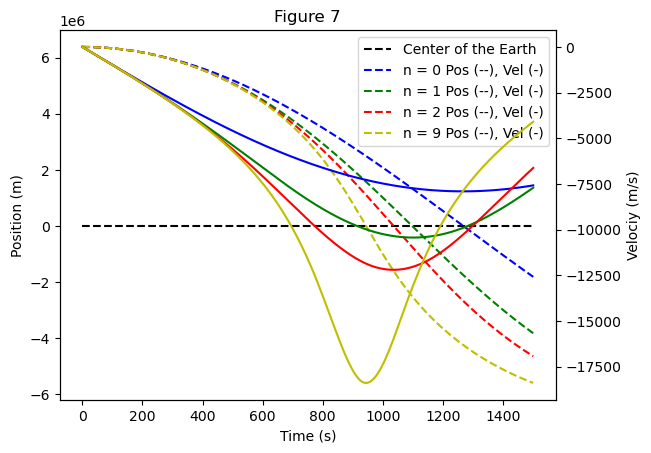

In [19]:
# part 3, 4

# F = M a, M=1    ->   a = F

alpha = 0
def grav_deriv7(t, s, n, rho_n):
    x, v = s
    dydt = v
    dvdt = -Fg(x, n, rho_n) + alpha*np.abs(v)**gamma
    return dydt, dvdt

x0,v0 = RE,0
t0,tf = 0, 1500
t_eval = np.linspace(t0,tf,tf)

def center7 (t,s, n, rho_n):
    return s[0]

fig, ax = plt.subplots()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Position (m)')
ax2 = ax.twinx()
ax2.set_ylabel('Velociy (m/s)')
ax.set_title('Figure 7')
ax.hlines(0, 0,tf, label='Center of the Earth', ls='--', color='k')
colors = ['b', 'g', 'r', 'y']

for i in range(len(n_arr)):
    soln7 = solve_ivp(grav_deriv7, (t0,tf), [x0, v0], args = (n_arr[i], rho_n_arr[i]), t_eval=t_eval, events=center7)
    ax.plot(t_eval, soln7.y[0], label = f'n = {n_arr[i]} Pos (--), Vel (-)', ls='--', c=colors[i])
    ax2.plot(t_eval, soln7.y[1], label = f'n = {n_arr[i]}', c=colors[i])
    
    print(f'When n = {n_arr[i]}, the test object reaches the center of the Earth at t = {soln7.t_events[0][0]:f} going {soln7.y_events[0][0][1]:f} m/s')

ax.legend();    

fig.savefig('Fig7.png')


# Part 6: A Lunar Mineshaft

In [20]:
# Part 1
alpha = 0

def grav_deriv_moon(t, s):
    x, v = s
    dydt = v
    dvdt = -(G * (Mm * (x/Rm)**3)) / x**2 + alpha*np.abs(v)**gamma
    return dydt, dvdt

t0, tf = 0, 2000
t_eval8 = np.linspace(t0,tf,tf)
x0,v0 = Rm, 0

soln8 = solve_ivp(grav_deriv_moon, (t0,tf), [x0,v0], t_eval = t_eval8, events=center)

print(f'The time for the test object to reach the center of the Moon is t = {soln8.t_events[0][0]:f} sec.')

The time for the test object to reach the center of the Moon is t = 1624.906529 sec.


In [21]:
# Part 2

De = ME / ((4/3)*np.pi*RE**3)
Dm = Mm / ((4/3)*np.pi*Rm**3)

print(f'The constant density of the Earth is {De:f} kg/m3 and the constant desity of the Moon is {Dm:f} kg/m3\nThis means that the Earth is {(De/Dm):f} times as dense as the Moon')

The constant density of the Earth is 5494.867410 kg/m3 and the constant desity of the Moon is 3341.753804 kg/m3
This means that the Earth is 1.644306 times as dense as the Moon


In [22]:
# Part 3

def tau(D):
    return (2*np.pi/(np.sqrt((4/3)*np.pi*G))) * 1/np.sqrt(D)

print(f'By arranging formula (7) in the assignment sheet to solve for v, plugging that into the period equation tau = 2*pi*r/v, and plugging in the equation for mass = density * volume, I got a relationship of period going like 1/sqrt(Density).\n\nThe orbital period of the Earth from Part 4 was tau = {period:f} sec. which matches with my calculated tau of {tau(De):f} sec. On the Moon, I calculate a tau of {tau(Dm):f}\nwhich is exactly 1/4 of the time it took the object to fall to the center of the Moon ({soln8.t_events[0][0]:f} sec.).\nThis confirms that my formula for period is correct and that orbital period is related to density like 1/sqrt(Density).')

By arranging formula (7) in the assignment sheet to solve for v, plugging that into the period equation tau = 2*pi*r/v, and plugging in the equation for mass = density * volume, I got a relationship of period going like 1/sqrt(Density).

The orbital period of the Earth from Part 4 was tau = 5069.371200 sec. which matches with my calculated tau of 5069.371200 sec. On the Moon, I calculate a tau of 6500.480747
which is exactly 1/4 of the time it took the object to fall to the center of the Moon (1624.906529 sec.).
This confirms that my formula for period is correct and that orbital period is related to density like 1/sqrt(Density).
